# Task 5 - 02 June 2025

# **Decision Trees and Ramdom Forest**

### *Importing Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


### *Loading Dataset*

In [5]:
df = pd.read_csv("heart.csv")

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### *Exploring the Data*

In [6]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### *Defining Features and Target*

In [7]:
X = df.drop('target', axis=1)
y = df['target']


### *Spliting the dataset*

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### *Training a Decision Tree Classifier*

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on test data
dt_preds = dt_model.predict(X_test)


### *Evaluating Decision Tree Model*

In [12]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.9707792207792207
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



### *Visualizing the Decision Tree*

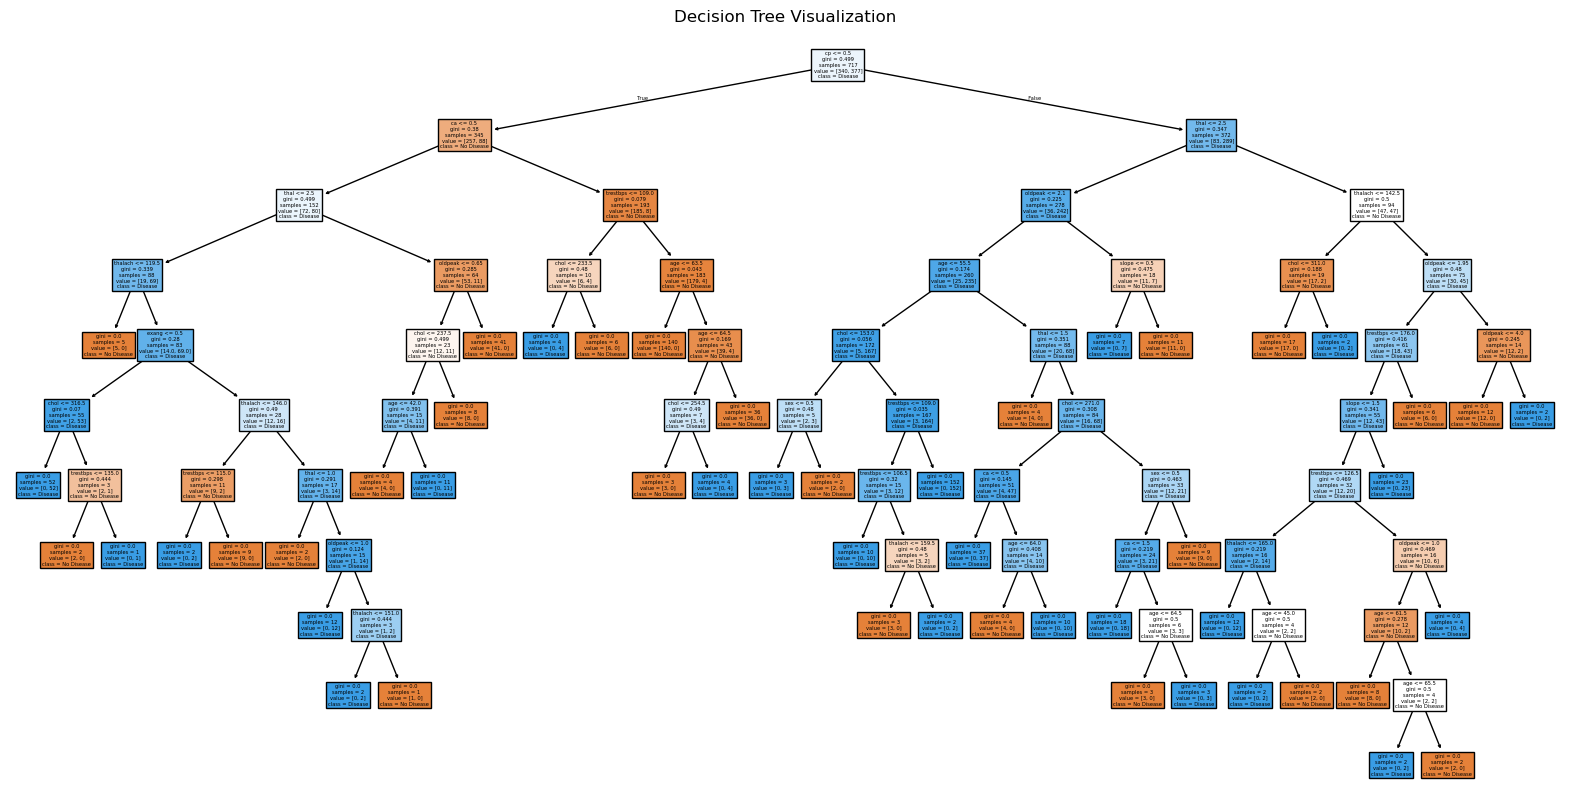

In [13]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### *Overfitting Analysis using max_depth*

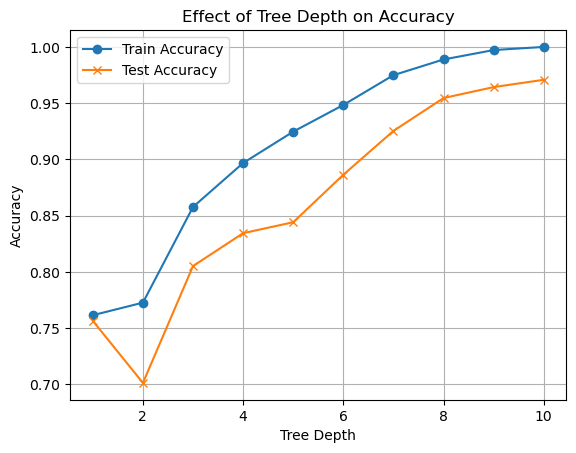

In [14]:
depths = list(range(1, 11))
train_accuracies = []
test_accuracies = []

for d in depths:
    temp_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    temp_model.fit(X_train, y_train)
    train_accuracies.append(temp_model.score(X_train, y_train))
    test_accuracies.append(temp_model.score(X_test, y_test))

# Plot the results
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='x')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Accuracy")
plt.legend()
plt.grid(True)
plt.show()


### *Training a Random Forest Classifier*

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting  and evaluating
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9805194805194806
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



### *Important Features Identified by Random Forest*

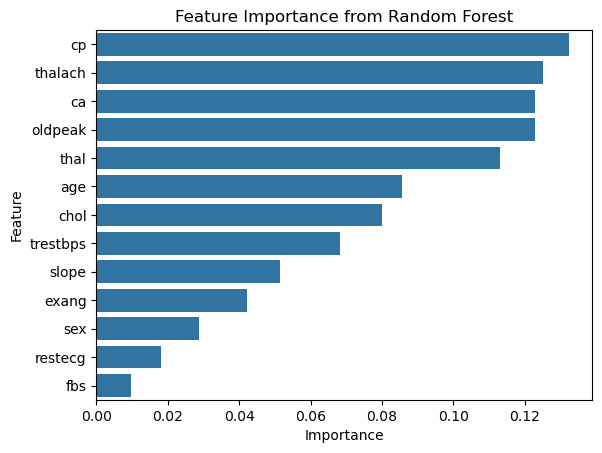

In [17]:
importances = rf_model.feature_importances_

feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance from Random Forest")
plt.show()


### *Cross-Validation Evaluation*

In [18]:
dt_cv_score = cross_val_score(dt_model, X, y, cv=5)
rf_cv_score = cross_val_score(rf_model, X, y, cv=5)

print("Cross-Validation Accuracy:")
print(f"Decision Tree: {dt_cv_score.mean():.4f}")
print(f"Random Forest: {rf_cv_score.mean():.4f}")


Cross-Validation Accuracy:
Decision Tree: 1.0000
Random Forest: 0.9971
